In [1]:
import pandas as pd
from sqlalchemy import create_engine, inspect

# Crear la cadena de conexión
username = ''
password = ''  
host = '200.13.4.226'
database = 'Museo'

# Crear la cadena de conexión
connection_string = f"mysql+pymysql://{username}:{password}@{host}/{database}"

# Crear el motor de conexión
engine = create_engine(connection_string)

# Crear el inspector
inspector = inspect(engine)

# Obtener los nombres de las tablas
table_names = inspector.get_table_names()

# Imprimir los nombres de las tablas
print("Tablas en la base de datos:", table_names)


Tablas en la base de datos: ['Artefacto', 'Artefacto_Exhibicion', 'Exhibicion', 'Museo', 'Museo_Exhibicion', 'Recorrido', 'Usuario']


In [3]:
# Describe las tablas
for table_name in table_names:
    print(f"Tabla: {table_name}")
    print("-" * 30)
    for column in inspector.get_columns(table_name):
        print(f"Nombre: {column['name']} / Tipo: {column['type']}")
    print("\n")

Tabla: Artefacto
------------------------------
Nombre: id / Tipo: INTEGER
Nombre: nombre / Tipo: VARCHAR(255)
Nombre: descripcion / Tipo: VARCHAR(255)
Nombre: imagen / Tipo: VARCHAR(255)
Nombre: familia / Tipo: VARCHAR(255)


Tabla: Artefacto_Exhibicion
------------------------------
Nombre: Artefactoid / Tipo: INTEGER
Nombre: Exhibicionid / Tipo: INTEGER


Tabla: Exhibicion
------------------------------
Nombre: id / Tipo: INTEGER
Nombre: nombre / Tipo: VARCHAR(255)
Nombre: descripcion / Tipo: VARCHAR(255)
Nombre: convenio / Tipo: VARCHAR(255)
Nombre: tematica / Tipo: VARCHAR(255)


Tabla: Museo
------------------------------
Nombre: id / Tipo: INTEGER
Nombre: nombre / Tipo: VARCHAR(255)
Nombre: ubicacion / Tipo: VARCHAR(255)


Tabla: Museo_Exhibicion
------------------------------
Nombre: Museoid / Tipo: INTEGER
Nombre: Exhibicionid / Tipo: INTEGER


Tabla: Recorrido
------------------------------
Nombre: id / Tipo: BIGINT
Nombre: fechaInicio / Tipo: DATETIME
Nombre: fechaTermino / 

In [23]:
# Definir la consulta SQL
query = """
SELECT 
    Usuario.nombre AS Nombre_Usuario,
    Usuario.apellidos AS Apellidos_Usuario,
    Usuario.correo AS Correo_Usuario,
    Exhibicion.nombre AS Nombre_Exhibicion,
    Recorrido.fechaInicio AS Fecha_Ingreso,
    Recorrido.fechaTermino AS Fecha_Salida
FROM 
    Recorrido
JOIN 
    Usuario ON Recorrido.Usuarioid = Usuario.id
JOIN 
    Exhibicion ON Recorrido.Exhibicionid = Exhibicion.id
WHERE 
    Recorrido.fechaInicio BETWEEN %s AND %s
ORDER BY 
    Recorrido.fechaInicio;
"""

# Definir las fechas de filtro 
fecha_inicio = '2023-01-01 00:00:00'
fecha_termino = '2023-03-28 23:59:59'

# Ejecutar la consulta con los filtros de fecha
df = pd.read_sql_query(query, engine, params=[fecha_inicio, fecha_termino])

# Mostrar el resultado
print(df)


   Nombre_Usuario Apellidos_Usuario                 Correo_Usuario  \
0            Juan             Pérez         juan.perez@example.com   
1           María            García       maria.garcia@example.com   
2          Carlos             López       carlos.lopez@example.com   
3             Ana          Martínez       ana.martinez@example.com   
4           Pedro         Rodríguez    pedro.rodriguez@example.com   
..            ...               ...                            ...   
83         Rafael         Rodríguez   rafael.rodriguez@example.com   
84       Cristina             Gómez     cristina.gomez@example.com   
85          David           Sánchez      david.sanchez@example.com   
86        Beatriz         Gutiérrez  beatriz.gutierrez@example.com   
87        Gustavo          Martínez   gustavo.martinez@example.com   

          Nombre_Exhibicion Fecha_Ingreso Fecha_Salida  
0            Antiguo Egipto    2023-01-01   2023-01-02  
1   Civilizaciones Antiguas    2023-01-02   2

In [16]:
# Definir la consulta SQL
query = """
SELECT 
    Exhibicion.nombre AS Nombre_Exhibicion,
    Exhibicion.descripcion AS Descripcion_Exhibicion,
    Exhibicion.tematica AS Tematica_Exhibicion,
    Exhibicion.convenio AS Convenio_Exhibicion,
    Artefacto.nombre AS Nombre_Artefacto,
    Artefacto.descripcion AS Descripcion_Artefacto,
    Artefacto.familia AS Familia_Artefacto,
    Recorrido.fechaInicio AS Fecha_Exhibicion
FROM 
    Exhibicion
JOIN 
    Artefacto_Exhibicion ON Exhibicion.id = Artefacto_Exhibicion.Exhibicionid
JOIN 
    Artefacto ON Artefacto_Exhibicion.Artefactoid = Artefacto.id
LEFT JOIN
    Recorrido ON Exhibicion.id = Recorrido.Exhibicionid
ORDER BY 
    Recorrido.fechaInicio;
"""

# Ejecutar la consulta
df2 = pd.read_sql_query(query, engine)

# Mostrar el resultado
print(df2)

          Nombre_Exhibicion  \
0            Antiguo Egipto   
1            Antiguo Egipto   
2            Antiguo Egipto   
3   Civilizaciones Antiguas   
4   Civilizaciones Antiguas   
..                      ...   
95       Arte Impresionista   
96              Arte Romano   
97              Arte Romano   
98              Arte Romano   
99            Arte Rupestre   

                               Descripcion_Exhibicion Tematica_Exhibicion  \
0   Exhibición de artefactos y reliquias del antig...                None   
1   Exhibición de artefactos y reliquias del antig...                None   
2   Exhibición de artefactos y reliquias del antig...                None   
3   Exhibición de artefactos de diferentes civiliz...                None   
4   Exhibición de artefactos de diferentes civiliz...                None   
..                                                ...                 ...   
95         Exhibición de obras de arte impresionistas                None   
96         

In [19]:
# Definir la consulta SQL
query = """
SELECT 
    Artefacto.id AS Id_Artefacto,
    Artefacto.nombre AS Nombre_Artefacto,
    Artefacto.descripcion AS Descripcion_Artefacto,
    Artefacto.familia AS Familia_Artefacto,
    Exhibicion.nombre AS Nombre_Exhibicion,
    Exhibicion.descripcion AS Descripcion_Exhibicion,
    Exhibicion.tematica AS Tematica_Exhibicion,
    Exhibicion.convenio AS Convenio_Exhibicion,
    Recorrido.fechaInicio AS Fecha_Exhibicion
FROM 
    Artefacto
JOIN 
    Artefacto_Exhibicion ON Artefacto.id = Artefacto_Exhibicion.Artefactoid
JOIN 
    Exhibicion ON Artefacto_Exhibicion.Exhibicionid = Exhibicion.id
LEFT JOIN
    Recorrido ON Exhibicion.id = Recorrido.Exhibicionid
WHERE 
    Recorrido.fechaInicio BETWEEN %s AND %s
    AND (%s IS NULL OR Artefacto.id = %s)
ORDER BY 
    Recorrido.fechaInicio;
"""

# Definir las fechas de filtro y el ID del artefacto
fecha_inicio = '2023-01-01 00:00:00'
fecha_termino = '2023-12-31 23:59:59'
artefacto_id = None  # Cambia a un ID específico si deseas filtrar por artefacto

# Ejecutar la consulta con los filtros de fecha y artefacto
df3 = pd.read_sql_query(query, engine, params=[fecha_inicio, fecha_termino, artefacto_id, artefacto_id])

# Mostrar el resultado
print(df3)



    Id_Artefacto         Nombre_Artefacto  \
0              1            Espada romana   
1              2           Vasija egipcia   
2              3     Pintura renacentista   
3              4           Amuleto azteca   
4              5         Escultura griega   
..           ...                      ...   
95            96             Máscara maya   
96            97           Papiro egipcio   
97            98        Artefacto sumerio   
98            99  Arco y flechas medieval   
99           100           Textil egipcio   

                                Descripcion_Artefacto Familia_Artefacto  \
0   Réplica de una espada utilizada por los romano...              None   
1   Antigua vasija de cerámica utilizada en el ant...              None   
2       Obra de arte de un pintor renacentista famoso              None   
3        Amuleto ceremonial utilizado por los aztecas              None   
4   Escultura representativa de la época clásica d...              None   
..       

         Fecha  Cantidad_Visitantes
0   2023-01-01                    1
1   2023-01-02                    1
2   2023-01-03                    1
3   2023-01-04                    1
4   2023-01-05                    1
..         ...                  ...
90  2023-04-01                    1
91  2023-04-02                    1
92  2023-04-03                    1
93  2023-04-04                    1
94  2023-04-05                    1

[95 rows x 2 columns]


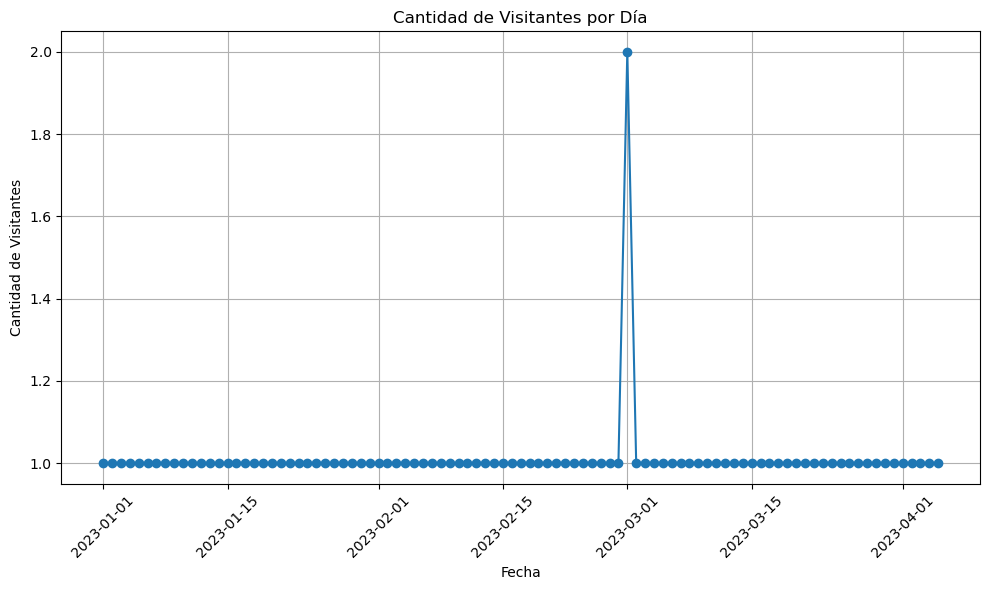

In [24]:
import matplotlib.pyplot as plt

# Definir la consulta SQL
query = """
SELECT 
    DATE(Recorrido.fechaInicio) AS Fecha,
    COUNT(DISTINCT Recorrido.Usuarioid) AS Cantidad_Visitantes
FROM 
    Recorrido
WHERE 
    Recorrido.fechaInicio BETWEEN %s AND %s
GROUP BY 
    Fecha
ORDER BY 
    Fecha;
"""

# Definir el rango de fechas
fecha_inicio = '2023-01-01'
fecha_termino = '2023-12-31'

# Ejecutar la consulta con el rango de fechas
df4 = pd.read_sql_query(query, engine, params=[fecha_inicio, fecha_termino])

# Mostrar el resultado
print(df4)

# Graficar los datos
plt.figure(figsize=(10, 6))
plt.plot(df4['Fecha'], df4['Cantidad_Visitantes'], marker='o')
plt.title('Cantidad de Visitantes por Día')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Visitantes')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [25]:
# Definir la consulta SQL
query = """
SELECT 
    Artefacto.familia AS Familia_Artefacto,
    Artefacto.id AS Id_Artefacto,
    Artefacto.nombre AS Nombre_Artefacto,
    Artefacto.descripcion AS Descripcion_Artefacto,
    Artefacto.imagen AS Imagen_Artefacto
FROM 
    Artefacto
ORDER BY 
    Artefacto.familia, Artefacto.nombre;
"""

# Ejecutar la consulta
df5 = pd.read_sql_query(query, engine)

# Mostrar el resultado
print(df5)


   Familia_Artefacto  Id_Artefacto         Nombre_Artefacto  \
0               None             4           Amuleto azteca   
1               None            14  Arco y flechas indígena   
2               None            39  Arco y flechas medieval   
3               None            69  Arco y flechas medieval   
4               None            99  Arco y flechas medieval   
..               ...           ...                      ...   
95              None            40           Textil egipcio   
96              None            15          Textil medieval   
97              None             2           Vasija egipcia   
98              None            74            Vasija romana   
99              None            44            Vasija romana   

                                Descripcion_Artefacto Imagen_Artefacto  
0        Amuleto ceremonial utilizado por los aztecas     imagen_4.jpg  
1      Arco y flechas utilizados por tribus indígenas    imagen_14.jpg  
2          Arco y flecha

In [28]:
# Definir la consulta SQL
query = """
SELECT 
    YEAR(Recorrido.fechaInicio) AS Anio,
    MONTH(Recorrido.fechaInicio) AS Mes,
    COUNT(DISTINCT Recorrido.Usuarioid) AS Cantidad_Visitantes
FROM 
    Recorrido
GROUP BY 
    Anio, Mes
ORDER BY 
    Anio, Mes;
"""

# Ejecutar la consulta
df6 = pd.read_sql_query(query, engine)

# Calcular el porcentaje de crecimiento o decrecimiento
df6['Cantidad_Visitantes_Anterior'] = df6['Cantidad_Visitantes'].shift(1)
df6['Crecimiento_Decrecimiento'] = ((df6['Cantidad_Visitantes'] - df6['Cantidad_Visitantes_Anterior']) / df6['Cantidad_Visitantes_Anterior']) * 100

# Mostrar el resultado
print(df6)


   Anio  Mes  Cantidad_Visitantes  Cantidad_Visitantes_Anterior  \
0  2023    1                   31                           NaN   
1  2023    2                   28                          31.0   
2  2023    3                   32                          28.0   
3  2023    4                    5                          32.0   

   Crecimiento_Decrecimiento  
0                        NaN  
1                  -9.677419  
2                  14.285714  
3                 -84.375000  


In [31]:
# Definir la consulta SQL
query = """
SELECT 
    YEAR(Recorrido.fechaInicio) AS Anio,
    MONTH(Recorrido.fechaInicio) AS Mes,
    Exhibicion.nombre AS Nombre_Exhibicion,
    COUNT(DISTINCT Recorrido.Usuarioid) AS Cantidad_Visitantes
FROM 
    Recorrido
JOIN 
    Exhibicion ON Recorrido.Exhibicionid = Exhibicion.id
WHERE 
    Recorrido.fechaInicio BETWEEN %s AND %s
GROUP BY 
    Anio, Mes, Exhibicion.nombre
ORDER BY 
    Anio, Mes, Cantidad_Visitantes DESC;
"""

# Ejecutar la consulta con el rango de fechas
df7 = pd.read_sql_query(query, engine, params=[fecha_inicio, fecha_termino])

# Mostrar el resultado
print(df7)


    Anio  Mes  Nombre_Exhibicion  Cantidad_Visitantes
0   2023    1      Arte Medieval                    3
1   2023    1      Arte Africano                    2
2   2023    1           Vikingos                    2
3   2023    1     Imperio Romano                    2
4   2023    1         Arte Persa                    2
..   ...  ...                ...                  ...
57  2023    4       Arte Egipcio                    1
58  2023    4      Arte Medieval                    1
59  2023    4  Arte Prehistórico                    1
60  2023    4  Arte Renacentista                    1
61  2023    4   Cultura Africana                    1

[62 rows x 4 columns]


In [32]:
# Definir la consulta SQL
query = """
SELECT 
    Usuario.nombre AS Nombre_Visitante,
    Usuario.apellidos AS Apellidos_Visitante,
    COUNT(Recorrido.id) AS Numero_Asistencias
FROM 
    Recorrido
JOIN 
    Usuario ON Recorrido.Usuarioid = Usuario.id
GROUP BY 
    Usuario.id
ORDER BY 
    Numero_Asistencias DESC;
"""

# Ejecutar la consulta
df8 = pd.read_sql_query(query, engine)

# Mostrar el resultado
print(df8)


   Nombre_Visitante Apellidos_Visitante  Numero_Asistencias
0              Juan               Pérez                   2
1            Carlos            Martínez                   1
2            Sandra              Moreno                   1
3              Rosa           Gutiérrez                   1
4             Laura             Sánchez                   1
..              ...                 ...                 ...
90          Natalia               Gómez                   1
91          Gustavo           Rodríguez                   1
92          Beatriz           Hernández                   1
93            David             Sánchez                   1
94         Cristina             Jiménez                   1

[95 rows x 3 columns]


In [33]:
# Definir la consulta SQL
query = """
SELECT 
    Exhibicion.tematica AS Categoria_Tematica,
    Exhibicion.nombre AS Nombre_Exhibicion
FROM 
    Exhibicion
ORDER BY 
    Categoria_Tematica, Nombre_Exhibicion;
"""

# Ejecutar la consulta
df9 = pd.read_sql_query(query, engine)

# Mostrar el resultado
print(df9)


   Categoria_Tematica Nombre_Exhibicion
0                None    Antiguo Egipto
1                None     Arte Africano
2                None     Arte Africano
3                None     Arte Africano
4                None     Arte Africano
..                ...               ...
90               None          Vikingos
91               None          Vikingos
92               None          Vikingos
93               None          Vikingos
94               None          Vikingos

[95 rows x 2 columns]


In [34]:
# Definir la consulta SQL
query = """
SELECT 
    Exhibicion.nombre AS Nombre_Exhibicion,
    Exhibicion.convenio AS Convenio_Exhibicion,
    Museo.nombre AS Nombre_Institucion
FROM 
    Exhibicion
JOIN 
    Museo_Exhibicion ON Exhibicion.id = Museo_Exhibicion.Exhibicionid
JOIN 
    Museo ON Museo_Exhibicion.Museoid = Museo.id
WHERE 
    Exhibicion.convenio IS NOT NULL
ORDER BY 
    Nombre_Exhibicion, Nombre_Institucion;
"""

# Ejecutar la consulta
df10 = pd.read_sql_query(query, engine)

# Mostrar el resultado
print(df10)


Empty DataFrame
Columns: [Nombre_Exhibicion, Convenio_Exhibicion, Nombre_Institucion]
Index: []
